<a href="https://colab.research.google.com/github/PrashantAghara/astronomical-data-analysis/blob/master/astronomical_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
csv_file = "https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-"

In [47]:
star_df = pd.read_csv(csv_file)

In [48]:
star_df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [49]:
star_df.sample(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
134,3542,0.000900,0.6200,14.230,1,Red,M
218,17140,883.000000,5.6530,-2.640,3,Blue-White,B
86,12010,0.000780,0.0092,12.130,2,Blue-White,B
105,14245,231000.000000,42.0000,-6.120,4,Blue,O
92,4077,0.085000,0.7950,6.228,3,Yellow-White,K
72,3304,0.008500,0.1800,13.200,1,Red,M
68,2774,0.000360,0.1180,17.390,0,Red,M
206,24020,0.001590,0.0127,10.550,2,Blue,B
4,1939,0.000138,0.1030,20.060,0,Red,M
97,7720,7.920000,1.3400,2.440,3,Yellow-White,F


In [50]:
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [51]:
folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok=True)

In [52]:
base_dir = f'/content/{folder_name}/'

In [53]:
star_df['Star type']

,Star type
0,0
1,0
2,0
3,0
4,0
...,...
235,5
236,5
237,5
238,5


In [54]:
star_df['Star type'].value_counts()

,count
Star type,
0,40
1,40
2,40
3,40
4,40
5,40


### MATPLOTLIB

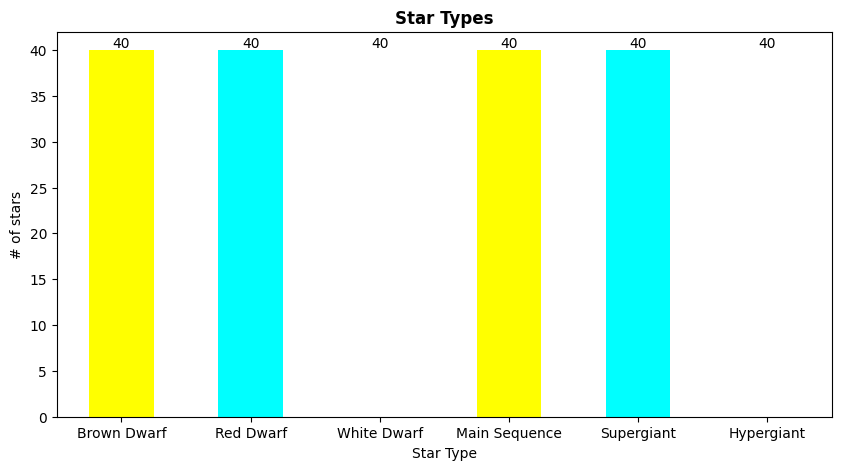

In [61]:
plt.figure(figsize=(10, 5))
plt.style.use('default')
ax = star_df['Star type'].value_counts().plot(kind='bar', color=['yellow', 'cyan', 'white'])
ax.bar_label(ax.containers[0])
plt.title('Star Types', weight='bold')
plt.xlabel('Star Type')
plt.ylabel('# of stars')
plt.xticks(ticks=[0,1,2,3,4,5], labels=['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant'])
plt.xticks(rotation=0)
plt.savefig(base_dir + 'star_types.png')
plt.show()

### SEABORN

In [56]:
star_df['Star color'].value_counts()

,count
Star color,
Red,116
Blue,56
Blue-White,41
Yellow-White,15
White,12


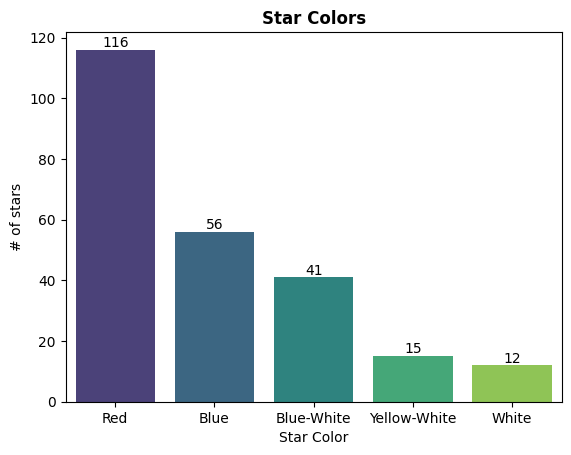

In [57]:
x_axis = star_df['Star color'].value_counts().index
ax = sns.barplot(x=x_axis, y=star_df['Star color'].value_counts(), palette='viridis', hue=x_axis, legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Star Colors', weight='bold')
plt.xlabel('Star Color')
plt.ylabel('# of stars')
plt.savefig(base_dir + 'star_colors.png')
plt.show()

#### Box Plot

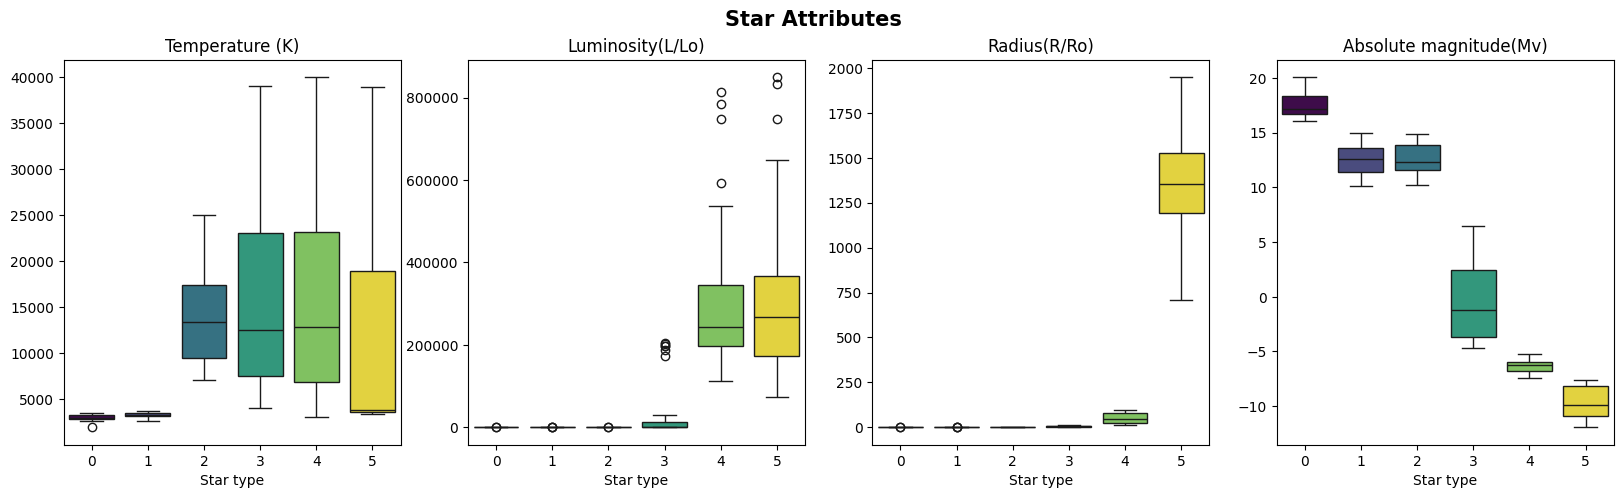

In [58]:

x_axis = star_df['Star type']
plt.figure(figsize=(20, 5))
plt.suptitle('Star Attributes', weight='bold', fontsize=15)
for i in range(4):
  plt.subplot(1, 4, i+1)
  sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, i], palette='viridis', hue=x_axis, legend=False)
  plt.ylabel('')
  plt.title(star_df.columns[i])
plt.savefig(base_dir + 'star_attributes.png')
plt.show()

#### Line Plot

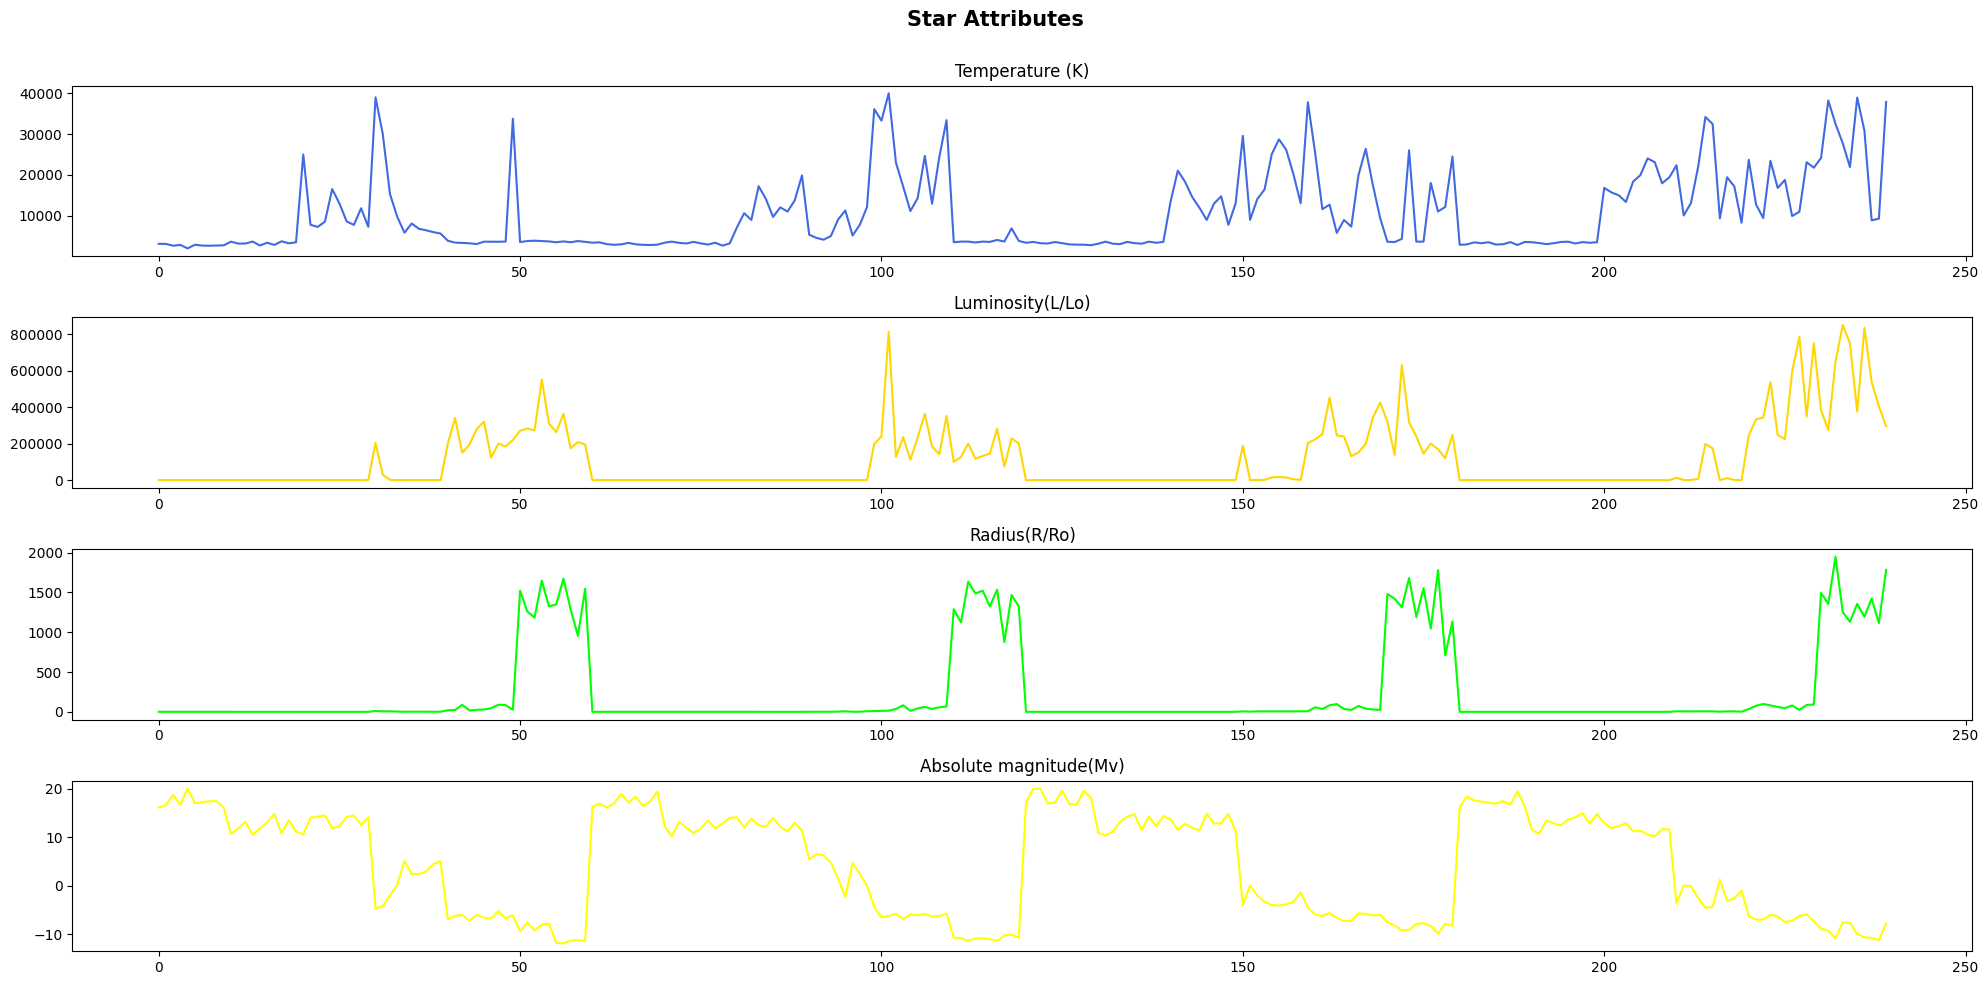

In [59]:
plt.figure(figsize=(20, 10))
colors = ['royalblue', 'gold', 'lime', 'yellow']
plt.suptitle('Star Attributes\n', weight='bold', fontsize=15)
for i in range(4):
  plt.subplot(4, 1, i+1)
  plt.plot(star_df.iloc[:,i], color=colors[i])
  plt.title(star_df.columns[i])
plt.tight_layout()
plt.savefig(base_dir + 'star_attributes_plot.png')
plt.show()

#### Pair Plot

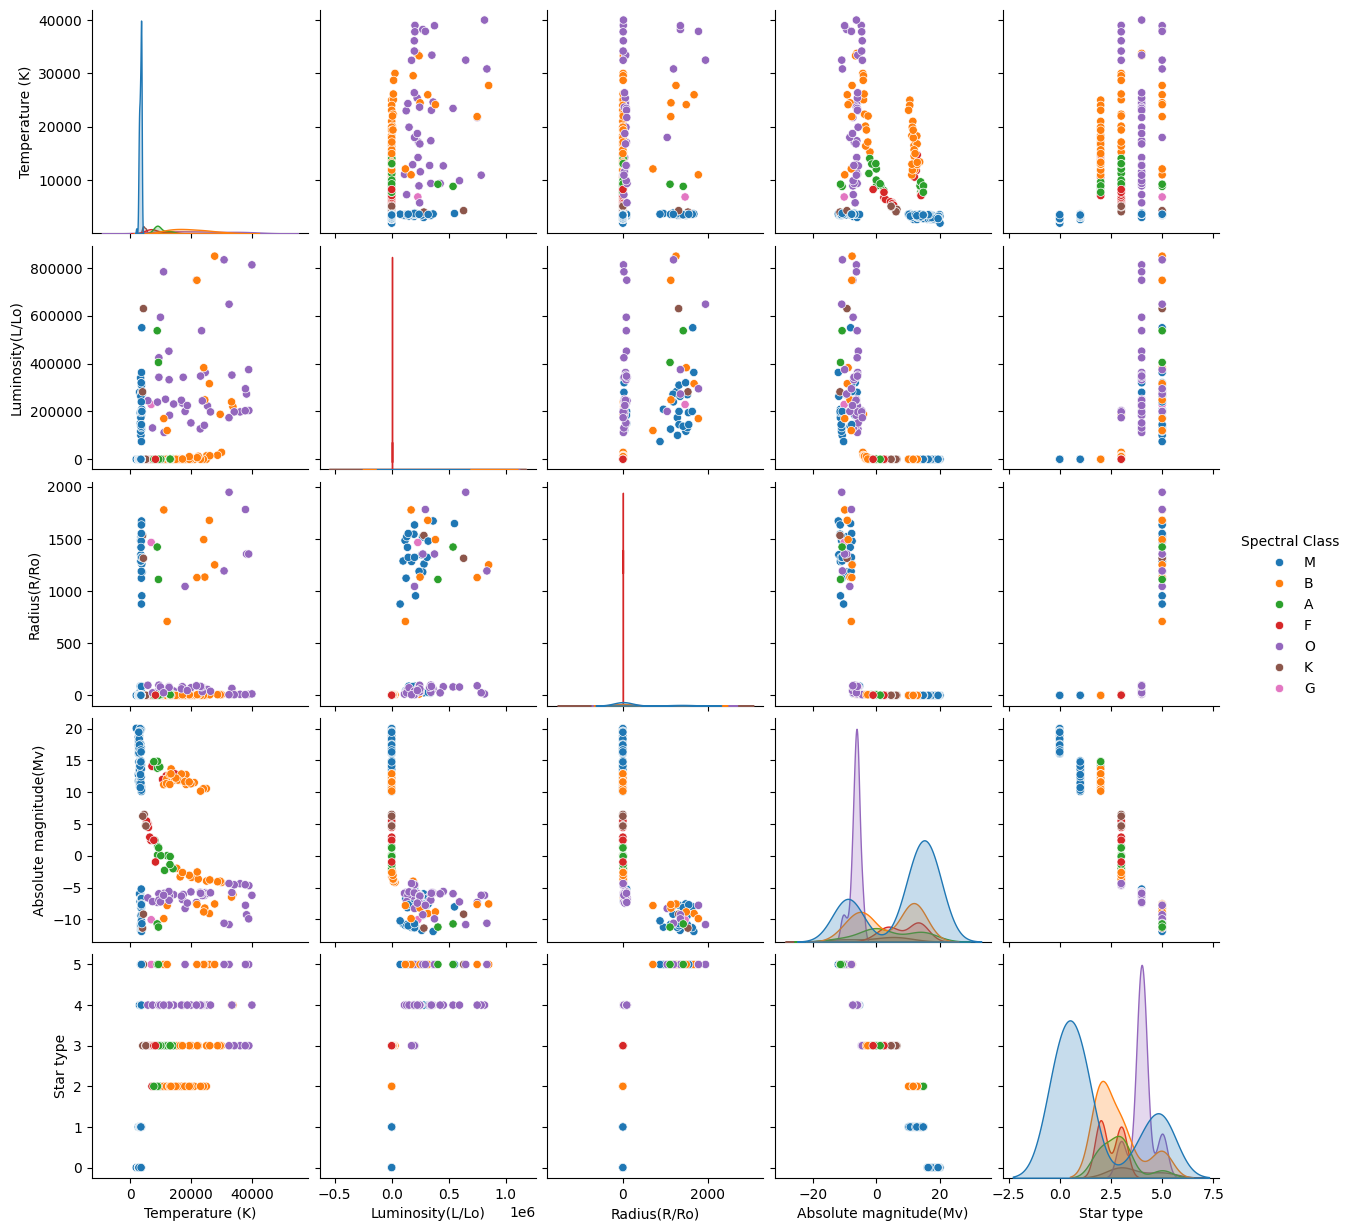

In [64]:
sns.pairplot(star_df, hue='Spectral Class')
plt.savefig(base_dir + 'star_pairplot.png')
plt.show()

#### HR Diagram

In [75]:
# Arrays to be used in the for loop
star_type = star_df['Star type'].values
temperatures = star_df['Temperature (K)'].values
abs_magnitudes = star_df['Absolute magnitude(Mv)'].values

# Python dictionaries --> Made of key value pairs --> To be used to get properties of star_type
star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'gold', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'}
}

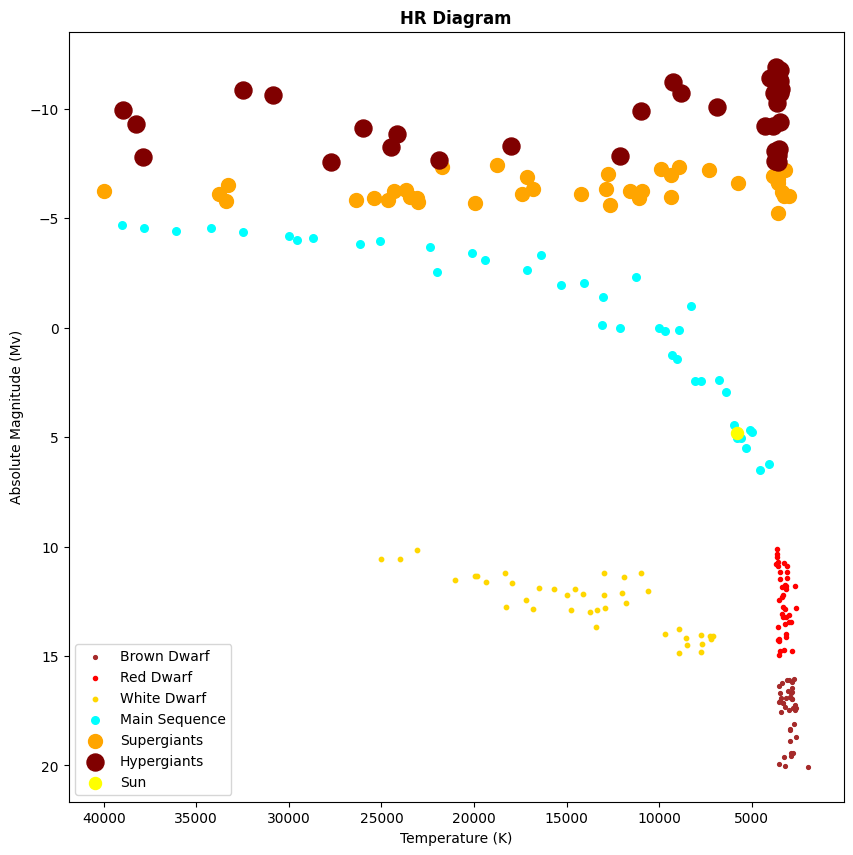

In [83]:

labels = set()
axes = []
plt.figure(figsize=(10, 10))
for i in range(len(star_type)):
  properties = star_types[star_type[i]]
  if properties['label'] not in labels:
    ax = plt.scatter(temperatures[i], abs_magnitudes[i],
                s=properties['size'],
                c=properties['color'],
                marker=properties['marker'],
                label=properties['label'])
    axes.append(ax)
    labels.add(properties['label'])
  else:
    plt.scatter(temperatures[i], abs_magnitudes[i],
                s=properties['size'],
                c=properties['color'],
                marker=properties['marker'],
                label=properties['label'])

ax_sun = plt.scatter(5772, 4.83, s=75, c='yellow', marker='o', label='Sun')
axes.append(ax_sun)
labels.add('Sun')

plt.legend(handles=axes)
plt.title('HR Diagram', weight='bold')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temperature (K)')
plt.ylabel('Absolute Magnitude (Mv)')
plt.savefig(base_dir + 'hr_diagram.png')
plt.show()

In [84]:
from google.colab import files
!zip -r /content/star_plots.zip /content/star_plots
files.download('/content/star_plots.zip')

  adding: content/star_plots/ (stored 0%)
  adding: content/star_plots/hr_diagram.png (deflated 12%)
  adding: content/star_plots/star_attributes.png (deflated 20%)
  adding: content/star_plots/star_pairplot.png (deflated 3%)
  adding: content/star_plots/star_types.png (deflated 23%)
  adding: content/star_plots/star_colors.png (deflated 19%)
  adding: content/star_plots/star_attributes_plot.png (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>